Packages

In [136]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble   import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Chargement des données IRIS via sklearn

In [67]:
#Iris data 
data = pd.read_csv('iris.csv')
data = data[['PetalLengthCm', 'PetalWidthCm', 'Species']]
data.head(5)
data['Species'] = data['Species'].str.replace('Iris-setosa', '1')
data['Species'] = data['Species'].str.replace('Iris-virginica', '2')
data['Species'] = data['Species'].str.replace('Iris-versicolor', '3')
data['Species'] = data['Species'].astype('int32')

In [73]:
#Division de données ( train - test)
from sklearn.model_selection import train_test_split
data_test,data_train = train_test_split(data, test_size = 0.8)

x_train = data_train[['PetalLengthCm','PetalWidthCm']]
y_train = data_train['Species']

x_test = data_test[['PetalLengthCm','PetalWidthCm']]
y_test = data_test['Species']

Les paramètres et les algorithmes à estimer lors du GridSearch

In [74]:
tab_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'KNeighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,5,11],
            'p':[1,2,3],
            'weights':['uniform','distance']
        }
    }
}

## GridSearchCV

GridSearchCV est le processus qui consiste à effectuer un réglage hyperparamétrique afin de déterminer les valeurs optimales pour un modèle donné. Ceci est important car les performances de l'ensemble du modèle sont basées sur les valeurs d'hyper paramètre spécifiées.

On va créer une fonction qui le dictionnaire déja crée et teste pour chaque algorithme l'ensemble des paramètres mentionné, la sortie sera une liste avec les meilleurs paramètres et le score

In [80]:
def test_model_param(params,X,y):
    scores = [] 
    for model_name, mp in params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(x_train, y_train)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return (pd.DataFrame(scores,columns=['model','best_score','best_params']))

In [81]:
test_model_param(tab_params,x_train,y_train)

,model,best_score,best_params
0,svm,0.950000,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,KNeighbors,0.958333,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}"


## TPOT

TPOT est un outil d'apprentissage automatique automatisé Python qui optimise les disciplines d'apprentissage automatique à l'aide de la programmation génétique. TPOT automatisera la partie la plus fastidieuse de l'apprentissage automatique en explorant intelligemment des milliers de pipelines possibles pour trouver le meilleur pour vos données. TPOT est construit sur scikit-learn, donc tout le code qu'il génère sera familier si vous avez déjà utilisé scikit-learn.

In [82]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10,population_size=50, verbosity=2,n_jobs=-1)
tpot.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.9666666666666666
Generation 2 - Current best internal CV score: 0.975
Generation 3 - Current best internal CV score: 0.975
Generation 4 - Current best internal CV score: 0.975
Generation 5 - Current best internal CV score: 0.9833333333333334
Generation 6 - Current best internal CV score: 0.9833333333333334
Generation 7 - Current best internal CV score: 0.9833333333333334
Generation 8 - Current best internal CV score: 0.9833333333333334
Generation 9 - Current best internal CV score: 0.9833333333333334
Generation 10 - Current best internal CV score: 0.9833333333333334
Best pipeline: KNeighborsClassifier(FastICA(input_matrix, tol=0.35000000000000003), n_neighbors=2, p=2, weights=distance)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=10,
               log_file=<colorama.ansitowin32.StreamWrapper object at 0x000001CB0EE2B3C8>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

Selon TPOT : le meilleure algorithme à utiliser est KNeighborsClassifier(FastICA(input_matrix, tol=0.35000000000000003), n_neighbors=2, p=2, weights=distance) <br> <br>
On va le tester : 

In [119]:
from sklearn.neural_network import MLPClassifier
distance = 5
model =  KNeighborsClassifier(n_neighbors=2, p=2, weights='distance')
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [132]:
y_true = y_test
y_pred = model.predict(x_test)

Matrice de confusion

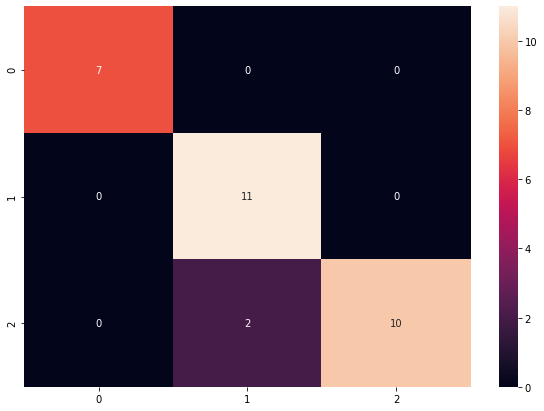

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

Accuracy

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9333333333333333